<a href="https://colab.research.google.com/github/Reshu20/COMPUTER-VISION/blob/master/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import statsmodels.tsa.api as tsa
statsmodels.tsa.holtwinters.ExponentialSmoothing
import pandas.util.testing as tm
import statsmodels.api 
import statsmodels as sm
statsmodels.tsa.holtwinters.ExponentialSmoothing
statsmodels.graphics.tsaplots.plot_acf
from pandas import read_csv, Grouper, DataFrame, concat
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import  mean_squared_error
statsmodels.tsa.holtwinters.ExponentialSmoothing
from statsmodels.tsa.holtwinters import  SimpleExpSmoothing,Holt, ExponentialSmoothing
import statsmodels.tsa.holtwinter as ets
import statsmodels.tools.eval_measures as fa
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import sys
import warnings
#import itertools warnings.filterwarnings("ignore")
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
get_ipython().run_line_magic('matplotlib', 'inline')



In [ ]:

import numpy as np
import pandas as pd
from datetime import datetime
from pandas import Series

In [ ]:
predice = pd.read_csv('train_csv.csv', header = 0, index_col = 1, parse_dates = True, squeeze = True)
predice.drop(['id'],axis = 1,inplace = True)


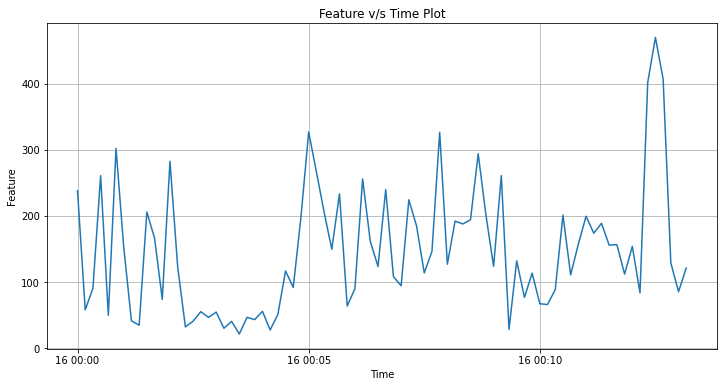

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(predice.index, predice['feature'])
plt.title('Feature v/s Time Plot')
plt.xlabel('Time')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

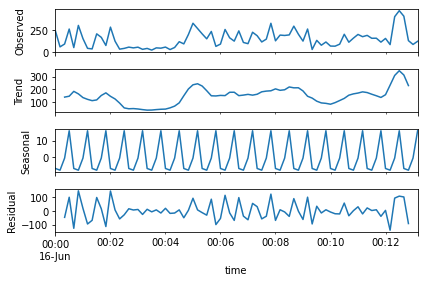

In [ ]:
decompPred = sm.tsa.seasonal_decompose(predice.feature, model="additive", freq=4)
decompPred.plot()
plt.show()


In [ ]:
#Splitting data to Test:Train
train = predice[0:int(len(predice)*0.7)] 
test = predice[int(len(predice)*0.7):]


In [ ]:
# extract out the time-series
feature_ts_train =  train['feature']
feature_ts_test =  test['feature']



In [ ]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(feature_ts_train)
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])


DF test statistic is -2.019
DF test p-value is 0.2782


Text(0, 0.5, 'Feature')

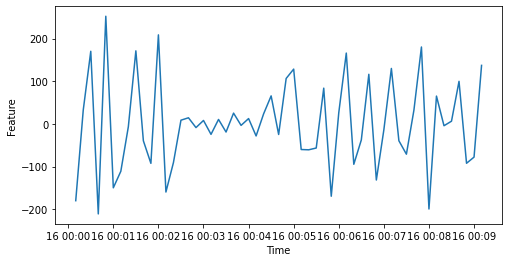

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(feature_ts_train.diff(periods=1))
plt.xlabel('Time')
plt.ylabel('Feature')


In [ ]:
dftest = adfuller(feature_ts_train)
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])


DF test statistic is -2.019
DF test p-value is 0.2782


In [ ]:
feature_ts_train_diff = feature_ts_train.diff(periods=1)
feature_ts_train_diff.dropna(inplace=True)

feature_ts_test_diff = feature_ts_test.diff(periods=1)
feature_ts_test_diff.dropna(inplace=True)

In [ ]:
#statsmodels.graphics.tsaplots.plot_pacf
#statsmodels.graphics.tsaplots.plot_acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
plt.xticks(range(0,30,1), rotation = 90)
sm.graphics.plot_acf(feature_ts_train_diff, lags=30, ax=axes[0])
sm.graphics.plot_pacf(feature_ts_train_diff, lags=30, ax=axes[1])
plt.tight_layout()


In [ ]:
# Build Model 
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(feature_ts_train_diff, order=(1, 1, 0)) #Chosen this combination of p,q,d after trying other combinations 
fitted = model.fit()  

# Forecast
fc, se, conf = fitted.forecast(24, alpha=0.05)  

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(8,5), dpi=100)
plt.plot(feature_ts_train_diff, label='training')
plt.plot(feature_ts_test_diff, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
forecast = fitted.forecast(steps=40)[0]
predice_to_pred = pd.read_csv('test_csv.csv')
predice_to_pred['forecast'] = forecast
predice_to_pred.head()



In [ ]:
predice_to_pred.to_excel("Solution.xlsx")  
